In [70]:
import importlib
import seaborn as sns
import ps1_functions as ps
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
importlib.reload(ps)

<module 'ps1_functions' from '/Users/venugopalbhatia/Documents/Deep Learning Theory and Applications/Assignment 1/ps1_functions.py'>

## Problem 1

Machine Learning Algorithms are those that can learn from past data and experience to make predictions. The machine is capable of learning by itself without human intervention or programming fixed rules. Most Machine Learning algorithms usually has three important components:

1. A decision function which makes predictions based on patterns in the data that may be labelled or unlabelled.
2. An error function to evaluate how off the algorithm's predictions are from true labels.
3. An optimization procedure which usually may involve something like the minimization of a cost function and adjusting feature weights accordingly.


## Problem 2

#### 2.1

In [61]:
N = [15,100]
sigma = [0,0.05,0.2]
points_set = {}
for n in N:
    for s in sigma:
        points_set[(n,s)] = ps.problem2_evaluate_function_on_random_noise(n,s) # Storing points in a dictionary called points set with N,Sigma as key



#### Plots

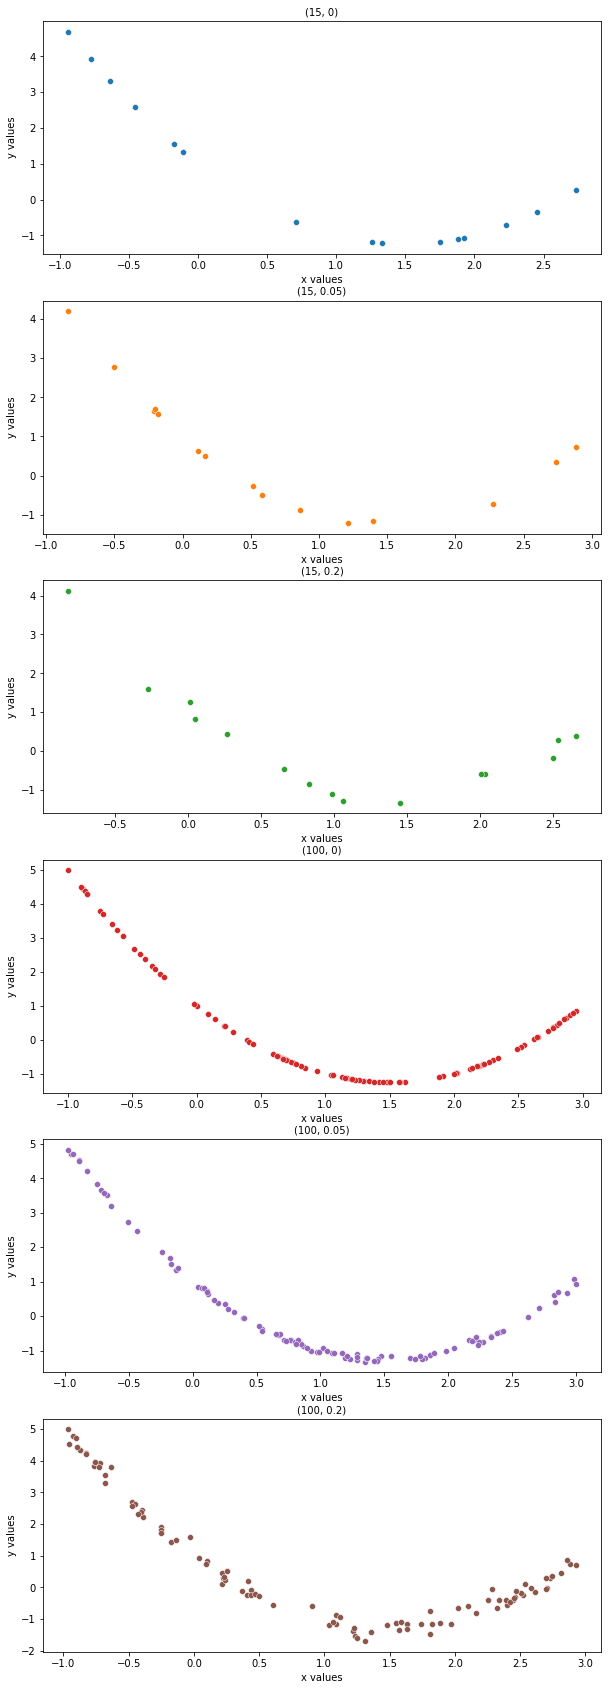

In [62]:
fig, ax = plt.subplots(6,1,figsize=(10,30))
j = 0
color_lst = sns.color_palette()
for i in points_set.keys():
  sns.scatterplot(x = points_set[i][0],y = points_set[i][1],color = color_lst[j],ax = ax[j])
  ax[j].set_title(i,fontsize = 10)
  ax[j].set_xlabel("x values")
  ax[j].set_ylabel("y values")
  j+=1

#### 2.2

In [69]:
import numpy as np

In [63]:
importlib.reload(ps)

<module 'ps1_functions' from '/Users/venugopalbhatia/Documents/Deep Learning Theory and Applications/Assignment 1/ps1_functions.py'>

In [64]:
points_set.keys()

dict_keys([(15, 0), (15, 0.05), (15, 0.2), (100, 0), (100, 0.05), (100, 0.2)])

In [65]:
def getX(deg,points):
    deg+=1
    points = np.array(points)
    arr = [points**i for i in range(deg)]
    arr = np.transpose(arr)
    X = np.array(arr)
    return X

In [66]:
def genPlot(deg,x,y,ax = None,reg = None):
    X = getX(deg,x)
    weights = ps.problem2_fit_polynomial(x,y,degree = deg,regularization=reg)
    np.array(weights)
    y_cap = np.dot(X,weights)
    mse = ((y-y_cap)**2).mean()
    if(ax):
        sns.scatterplot(x=x,y=y,ax=ax)
        sns.lineplot(x=x,y=y_cap,ax=ax)
    else:
        sns.scatterplot(x=x,y=y)
        sns.lineplot(x=x,y=y_cap)
    return weights,mse


#### Degree 1 plots and table

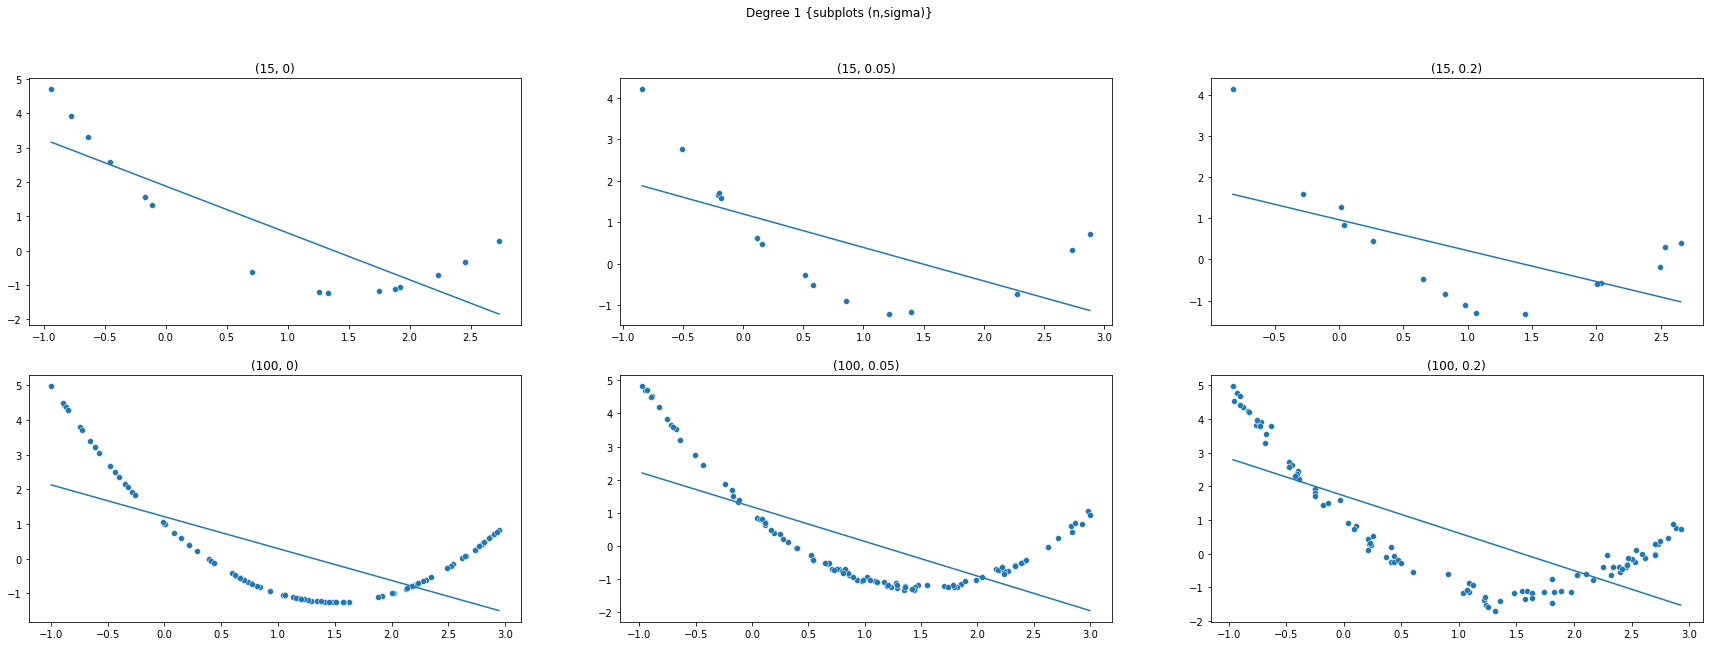

In [67]:
fig, ax = plt.subplots(2,3,figsize=(30,10))
fig.suptitle("Degree 1 {subplots (n,sigma)}")
degree_1_weights_mse = {}
res = None
for i,n in enumerate(N):
    for j,s in enumerate(sigma):
        points = points_set[(n,s)]
        res = genPlot(1,x=list(points[0]),y=list(points[1]),ax=ax[i,j])
        degree_1_weights_mse[(n,s)] = res
        ax[i,j].set_title((n,s))
    

##### Table for degree 1 weights and MSE

In [87]:
weights_sep = pd.DataFrame(table1['Weights'].tolist(),index = table1.index)
pd.concat([weights_sep,table1],axis = 1)

,0,1,Weights,MSE
"(15, 0)",1.879221,-1.364174,"[1.8792208059141515, -1.3641741706339205]",1.132380
"(15, 0.05)",1.203535,-0.807622,"[1.2035345398075352, -0.8076221135074123]",1.399525
"(15, 0.2)",0.964022,-0.750415,"[0.9640222319220002, -0.7504149662524976]",1.242017
"(100, 0)",1.211371,-0.919357,"[1.211370761450031, -0.9193571587996119]",1.588721
"(100, 0.05)",1.186106,-1.043580,"[1.1861057549091194, -1.0435800515009457]",1.509685
"(100, 0.2)",1.720281,-1.113110,"[1.720280906426236, -1.1131103217927516]",1.561374


In [88]:
table1 = pd.DataFrame.from_dict(degree_1_weights_mse,orient = "index")
table1.rename({0:'Weights',1:"MSE"},axis = "columns",inplace=True)
weights_sep = pd.DataFrame(table1['Weights'].tolist(),index = table1.index)
table1 = pd.concat([weights_sep,table1],axis = 1)
table1

,0,1,Weights,MSE
"(15, 0)",1.879221,-1.364174,"[1.8792208059141515, -1.3641741706339205]",1.132380
"(15, 0.05)",1.203535,-0.807622,"[1.2035345398075352, -0.8076221135074123]",1.399525
"(15, 0.2)",0.964022,-0.750415,"[0.9640222319220002, -0.7504149662524976]",1.242017
"(100, 0)",1.211371,-0.919357,"[1.211370761450031, -0.9193571587996119]",1.588721
"(100, 0.05)",1.186106,-1.043580,"[1.1861057549091194, -1.0435800515009457]",1.509685
"(100, 0.2)",1.720281,-1.113110,"[1.720280906426236, -1.1131103217927516]",1.561374


##### Degree 2 plots and table

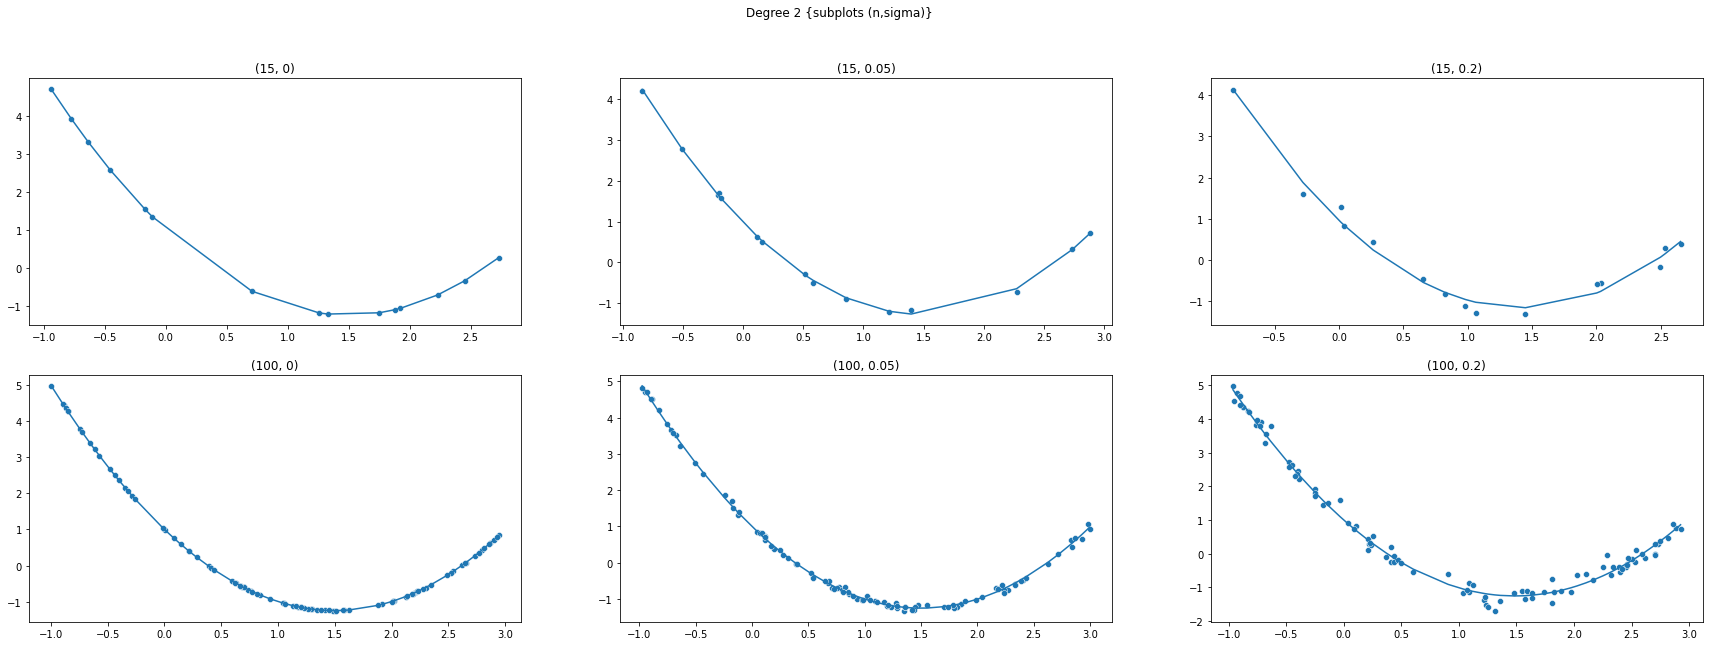

In [89]:
fig, ax = plt.subplots(2,3,figsize=(30,10))
fig.suptitle("Degree 2 {subplots (n,sigma)}")
degree_2_weights_mse = {}
res = None
for i,n in enumerate(N):
    for j,s in enumerate(sigma):
        points =  points_set[(n,s)]
        res = genPlot(2,x=list(points[0]),y=list(points[1]),ax=ax[i,j])
        degree_2_weights_mse[(n,s)] = res
        ax[i,j].set_title((n,s))
    

##### Table for degree 2 weights and MSE

In [90]:
table2 = pd.DataFrame.from_dict(degree_2_weights_mse,orient = "index")
table2.rename({0:'Weights',1:"MSE"},axis = "columns",inplace=True)
weights_sep = pd.DataFrame(table2['Weights'].tolist(),index = table2.index)
table2 = pd.concat([weights_sep,table2],axis = 1)
table2

,0,1,2,Weights,MSE
"(15, 0)",1.000000,-3.000000,1.000000,"[1.0, -3.000000000000005, 1.0000000000000022]",9.420314e-30
"(15, 0.05)",0.981414,-3.028709,1.018438,"[0.9814139109461174, -3.0287091434941935, 1.01...",2.332230e-03
"(15, 0.2)",0.957007,-3.002843,1.058303,"[0.9570066003325552, -3.002843390245458, 1.058...",3.597332e-02
"(100, 0)",1.000000,-3.000000,1.000000,"[0.9999999999999998, -2.9999999999999982, 0.99...",1.244428e-30
"(100, 0.05)",0.999535,-3.002946,0.999400,"[0.9995354732353314, -3.0029463712111113, 0.99...",3.533661e-03
"(100, 0.2)",0.998409,-3.039987,1.022641,"[0.9984087351078339, -3.039986854497805, 1.022...",3.269226e-02


##### Degree 9 plots and table

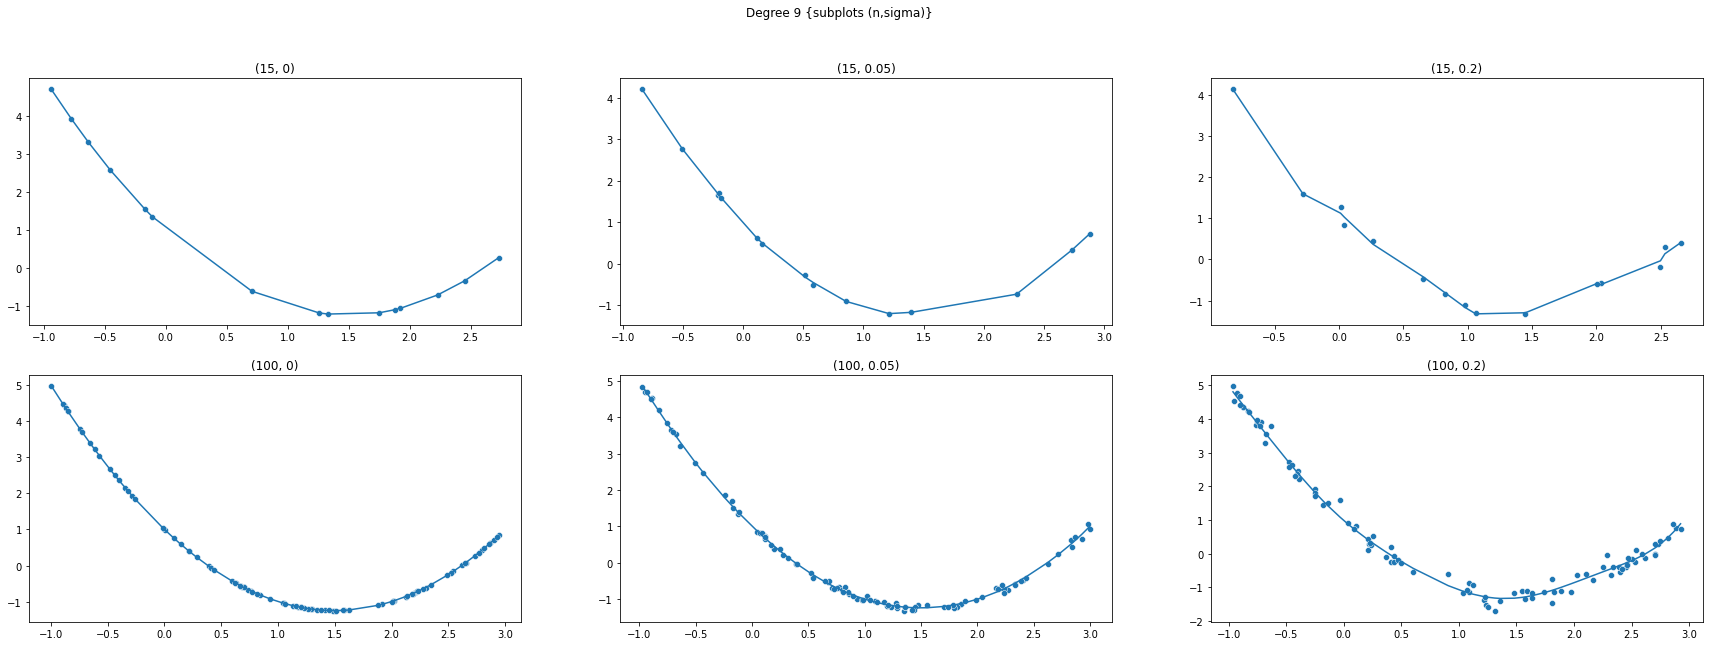

In [91]:
fig, ax = plt.subplots(2,3,figsize=(30,10))
fig.suptitle("Degree 9 {subplots (n,sigma)}")
degree_9_weights_mse = {}
res = None
for i,n in enumerate(N):
    for j,s in enumerate(sigma):
        points =  points_set[(n,s)]
        res = genPlot(9,x=list(points[0]),y=list(points[1]),ax=ax[i,j])
        degree_9_weights_mse[(n,s)] = res
        ax[i,j].set_title((n,s))
    


##### Table for degree 9 weights and MSE

In [92]:
table3 = pd.DataFrame.from_dict(degree_9_weights_mse,orient = "index")
table3.rename({0:'Weights',1:"MSE"},axis = "columns",inplace=True)
weights_sep = pd.DataFrame(table3['Weights'].tolist(),index = table3.index)
table3 = pd.concat([weights_sep,table3],axis = 1)
table3

,0,1,2,3,4,5,6,7,8,9,Weights,MSE
"(15, 0)",1.000000,-3.000000,1.000000,-6.930350e-10,9.604264e-10,-5.129550e-10,1.600711e-10,-7.275958e-12,-1.182343e-11,1.932676e-12,"[1.0000000036814072, -2.9999999984693204, 0.99...",8.577529e-18
"(15, 0.05)",0.969609,-3.187779,1.496195,4.549030e-01,-2.224640e+00,9.506752e-01,1.711533e+00,-1.776273e+00,5.996526e-01,-6.935072e-02,"[0.9696089679528086, -3.1877793432358885, 1.49...",6.938137e-04
"(15, 0.2)",1.163141,-3.219564,-1.485216,1.294180e+01,-1.561997e+01,-6.516661e+00,2.434842e+01,-1.747751e+01,5.236856e+00,-5.786421e-01,"[1.1631414561416022, -3.2195644195599016, -1.4...",8.103219e-03
"(100, 0)",1.000000,-3.000000,1.000000,-8.217285e-10,-4.365575e-11,1.382432e-10,1.891749e-10,-2.473826e-10,8.731149e-11,-9.549694e-12,"[0.999999983599082, -2.9999999960282366, 1.000...",1.351783e-16
"(100, 0.05)",1.004592,-2.989460,0.917301,-2.883290e-02,1.925708e-01,-6.711887e-02,-1.022529e-01,9.016881e-02,-2.662744e-02,2.755949e-03,"[1.0045915796747522, -2.9894601419728133, 0.91...",3.506063e-03
"(100, 0.2)",0.984619,-2.976995,1.340729,-4.222023e-01,-5.700316e-01,6.577567e-01,1.017509e-01,-2.812202e-01,9.774059e-02,-1.044394e-02,"[0.9846189979250539, -2.976994716512081, 1.340...",2.946640e-02


It seems like degree 9 plots seem to overfit, this is evident in the 15,0.2 plot, probably would be even more evident in all the plots if the image size and scale are adjusted. Degree 1 plots are obviously underfit and overall degree 2 curves seem to fit best, however with degree 9 curves for 100 values the curves seem to have fit quite well, comparable to degree 2 which is also suggested by the weights.

#### 2.3

##### L2 Norm to N -> {15,100}, sigma = 0.05, 3 custom lambda values

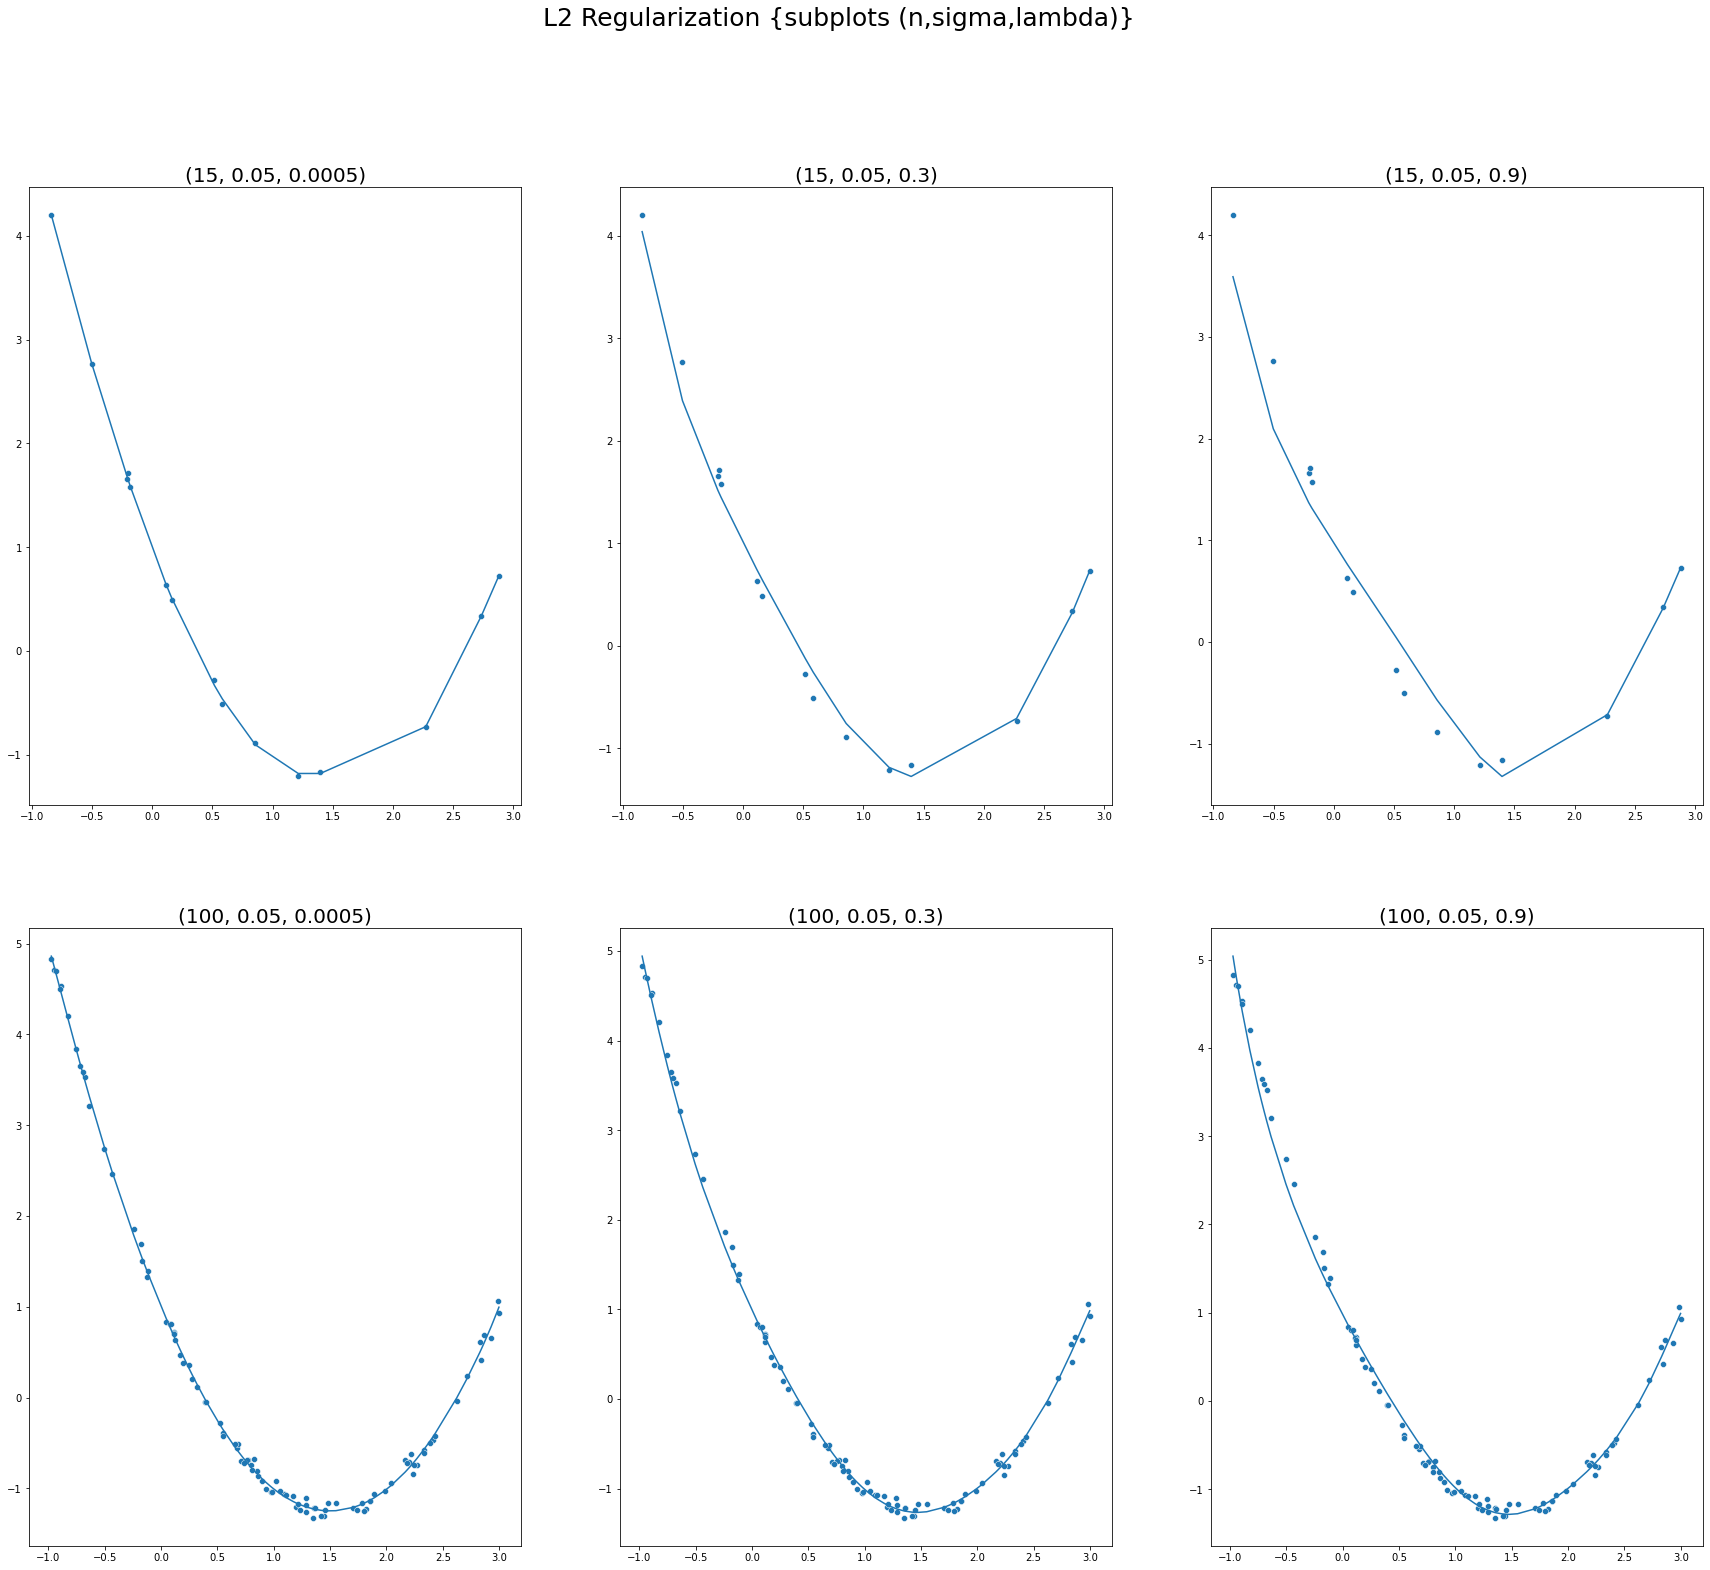

In [94]:
fig, ax = plt.subplots(2,3,figsize=(30,25))
fig.suptitle("L2 Regularization {subplots (n,sigma,lambda)}",fontsize = 25)
L2_weights_MSE = {}
res = None
N_L2 = [15,100]
sigma_L2 = [0.05]
lambda_L2 = [0.0005,0.3,0.9]
for i,n in enumerate(N_L2):
    for j,s in enumerate(sigma_L2):
        for k,l in enumerate(lambda_L2):
            points =  points_set[(n,s)]
            res = genPlot(9,x=list(points[0]),y=list(points[1]),ax=ax[i,k],reg=l)
            L2_weights_MSE[(n,s,l)] = res
            ax[i,k].set_title((n,s,l),fontsize = 20)

##### Table for L2 Norm - Degree 9 weights and MSE

In [95]:
table4 = pd.DataFrame.from_dict(L2_weights_MSE,orient = "index")
table4.rename({0:'Weights',1:"MSE"},axis = "columns",inplace=True)
weights_sep = pd.DataFrame(table4['Weights'].tolist(),index = table4.index)
table4 = pd.concat([weights_sep,table4],axis = 1)
table4

,0,1,2,3,4,5,6,7,8,9,Weights,MSE
"(15, 0.05, 0.0005)",0.984615,-3.109325,1.148757,0.124943,-0.808411,0.514174,0.587338,-0.738103,0.268733,-0.032583,"[0.9846147439975539, -3.1093250098674616, 1.14...",0.000812
"(15, 0.05, 0.3)",1.006529,-2.326888,0.417059,-0.522469,0.491643,-0.100202,0.258069,-0.279775,0.101985,-0.012376,"[1.0065294282036206, -2.326888107208646, 0.417...",0.026893
"(15, 0.05, 0.9)",0.966087,-1.834666,0.346373,-0.644099,0.385002,-0.215637,0.339332,-0.202677,0.048095,-0.003990,"[0.9660868454746172, -1.8346662784994336, 0.34...",0.104581
"(100, 0.05, 0.0005)",1.004580,-2.987723,0.915264,-0.032596,0.198509,-0.067253,-0.105855,0.092494,-0.027218,0.002811,"[1.0045801654048319, -2.987722695721459, 0.915...",0.003506
"(100, 0.05, 0.3)",0.994516,-2.704775,0.740087,-0.399535,0.432881,0.026062,-0.127767,0.029067,0.004009,-0.001315,"[0.9945161063924957, -2.704775269309266, 0.740...",0.005471
"(100, 0.05, 0.9)",0.974775,-2.438656,0.584635,-0.542630,0.473109,-0.020840,0.057768,-0.112978,0.045401,-0.005560,"[0.9747753537255619, -2.438655936695369, 0.584...",0.013592


## Problem 3

In [492]:
importlib.reload(ps)

<module 'ps1_functions' from '/Users/venugopalbhatia/Documents/Deep Learning Theory and Applications/Assignment 1/ps1_functions.py'>

In [382]:
import pandas as pd
data = pd.read_csv('data/problem3_data_seed.dat',sep = r'\s+',header = None)

In [424]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_t = scaler.fit_transform(data.iloc[:,0:7])

In [454]:
y = data[7]
y = y.values

In [425]:
data_t

array([[0.44098206, 0.50206612, 0.5707804 , ..., 0.48610121, 0.18930164,
        0.34515017],
       [0.40509915, 0.44628099, 0.66243194, ..., 0.50106914, 0.03288302,
        0.21516494],
       [0.34938621, 0.34710744, 0.87931034, ..., 0.50392017, 0.25145302,
        0.1506647 ],
       ...,
       [0.24645892, 0.25826446, 0.7277677 , ..., 0.42908054, 0.98166664,
        0.26440177],
       [0.11803588, 0.16528926, 0.39927405, ..., 0.14682823, 0.36834441,
        0.25849335],
       [0.16147309, 0.19214876, 0.54718693, ..., 0.24518888, 0.63346292,
        0.26784835]])

In [458]:
# from sklearn.model_selection import train_test_split

# x_train,x_test,y_train,y_test = train_test_split(data_t,y,stratify = y)

In [493]:
#predicted_labels = ps.problem3_knn_classifier(x_train,y_train,x_test,5)

In [547]:
def getAccuracy(predicted_labels,true_labels):
    return sum(predicted_labels == true_labels)/len(true_labels)

In [532]:
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

In [694]:
def kFoldSplit(k,x,y):
    shuffler = np.random.permutation(len(data_t))
    x = x[shuffler]
    y = y[shuffler]
    x_split = list(split(x,k))
    y_split = list(split(y,k))
    
    return x_split,y_split

    
    
    

In [1054]:
def kFoldCV(k_folds,x,y,fcn,**kwargs):
    x_split,y_split = kFoldSplit(k_folds,x,y)
    accuracy_folds = {}
    accuracy_folds_train = {}
    #print(len(x_split))
    for i in range(k_folds):

        t_x = x_split.copy()
        t_y = y_split.copy()

        x_fold_cv = t_x.pop(i)
        y_fold_cv = t_y.pop(i)

        t_y = np.concatenate(t_y).ravel()
        t_x = np.vstack(t_x)
        #print(y_fold_cv[0:5])
        #predicted_labels_test = ps.problem3_knn_classifier(t_x,t_y,x_fold_cv,knn_k)
        predicted_labels_test = fcn(t_x,t_y,x_fold_cv,**kwargs)
        predicted_labels_train = fcn(t_x,t_y,t_x,**kwargs)
        test_accuracy = getAccuracy(predicted_labels_test,y_fold_cv)
        train_accuracy = getAccuracy(predicted_labels_train,t_y)
        fold = "fold_"+str(i)
        accuracy_folds[fold] = test_accuracy
        accuracy_folds_train[fold] = train_accuracy
    return accuracy_folds,accuracy_folds_train






In [1127]:
def getAverageKFoldAccuracy(folds):
    return sum(list(folds.values()))/len(list(folds.values()))

##### Plotting test error versus k

In [1129]:
test_error_kFoldCV= {}
train_error_kFoldCV= {}
k = [1,5,10,15]
k_folds = [5,len(data_t)]
for i in k_folds:
    test_error_kFoldCV[i] = {}
    train_error_kFoldCV[i] = {}
    for num_neighbors in k:
        accuracy_ = None
        train_accuracy = None
        error_ = None
        train_error = None
        accuracy_,train_accuracy = kFoldCV(i,data_t,y,fcn = ps.problem3_knn_classifier,k = num_neighbors)
        error_ = 1 - getAverageKFoldAccuracy(accuracy_)
        train_error = 1 - getAverageKFoldAccuracy(train_accuracy)
        test_error_kFoldCV[i][num_neighbors] = error_
        train_error_kFoldCV[i][num_neighbors] = train_error


Given Below are the train and test errors, k = 1 seems like an overfit while k = 15 seems like an underfit

In [1130]:
test_error_kFoldCV

{5: {1: 0.07619047619047614,
  5: 0.080952380952381,
  10: 0.07619047619047614,
  15: 0.07142857142857151},
 210: {1: 0.05714285714285716,
  5: 0.0714285714285714,
  10: 0.080952380952381,
  15: 0.080952380952381}}

In [1131]:
train_error_kFoldCV

{5: {1: 0.0,
  5: 0.03809523809523818,
  10: 0.055952380952380976,
  15: 0.06666666666666665},
 210: {1: 0.0,
  5: 0.042788790157212264,
  10: 0.057142857142858605,
  15: 0.07174755069492056}}

##### 5 fold CV errors

(0.07, 0.085)

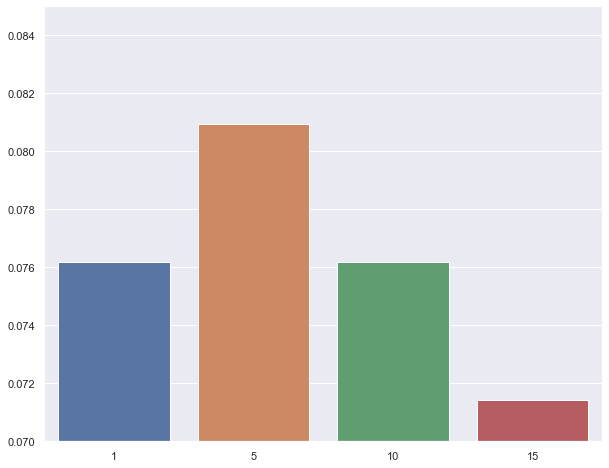

In [1132]:
nbr_kf = list(test_error_kFoldCV[5].keys())
error_kf = list(test_error_kFoldCV[5].values())
sns.set(rc = {'figure.figsize':(10,8)})
kf = sns.barplot(x = nbr_kf,y = error_kf)
kf.set_ylim(0.07,0.085)

##### LOOCV errors

(0.05, 0.085)

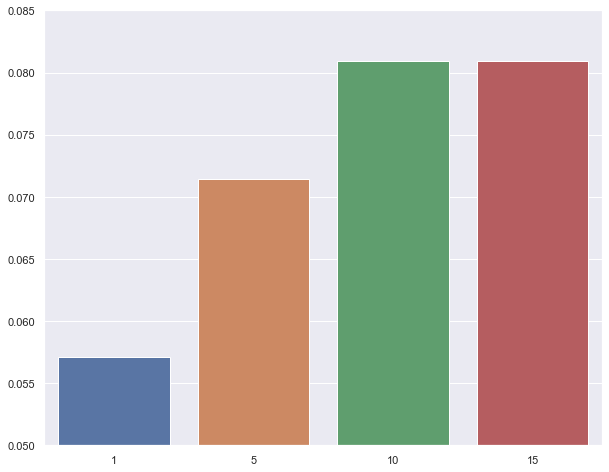

In [1133]:
nbr_kf = list(test_error_kFoldCV[210].keys())
error_kf = list(test_error_kFoldCV[210].values())
sns.set(rc = {'figure.figsize':(10,8)})
kf = sns.barplot(x = nbr_kf,y = error_kf)
kf.set_ylim(0.05,0.085)


##### 3.3

In [1138]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC

In [1139]:
## Writing wrapper fcns here to work with kFoldCV(), though could have written just one function
def SVM_classifier(x,y,x_test,**kwargs):
    clf = SVC(gamma = "auto",**kwargs)
    clf.fit(x,y)
    y_pred  = clf.predict(x_test)
    return y_pred
def RF_classifier(x,y,x_test,**kwargs):
    clf = RFC(oob_score = True,**kwargs)
    clf.fit(x,y)
    y_pred  = clf.predict(x_test)
    return y_pred


In [1113]:
x_split,y_split = kFoldSplit(5,data_t,y)
t_x = x_split.copy()
t_y = y_split.copy()
x_fold_cv = t_x.pop(1)
y_fold_cv = t_y.pop(1)

t_y = np.concatenate(t_y).ravel()
t_x = np.vstack(t_x)

y_predictions = SVM_classifier(t_x,t_y,t_x,C = 2,kernel = 'linear')
getAccuracy(y_predictions,t_y)

SVC(C=2, gamma='auto', kernel='linear')


0.9523809523809523

#### Testing the SVM function

In [1120]:
# Could have used GridSearchCV or Hyperopt but manually going through values here for C and Kernel of SVM
test_error_kFoldCV = {}
train_error_kFoldCV = {}
C = [0.1,1.0,5.0,10.0,100.0]
k_folds = [5,len(data_t)]
kernels = ['rbf','linear','poly']
for i in k_folds:
    test_error_kFoldCV[i] = {}
    train_error_kFoldCV[i] = {}
    for C_vals in C:
        for kernel in kernels:
            accuracy_ = None
            train_accuracy = None
            error_ = None
            train_error = None
            accuracy_,train_accuracy = kFoldCV(i,data_t,y,fcn = SVM_classifier,C = 1.0,kernel = kernel)
    
            error_ = 1 - getAverageKFoldAccuracy(accuracy_)
            train_error = 1 - getAverageKFoldAccuracy(train_accuracy)
            test_error_kFoldCV[i][(C_vals,kernel)] = error_
            train_error_kFoldCV[i][(C_vals,kernel)] = train_error

In [1123]:
df_svm_test = pd.DataFrame.from_dict(test_error_kFoldCV,orient = "index")

In [1124]:
df_svm_train = pd.DataFrame.from_dict(train_error_kFoldCV,orient = "index")

##### Reporting train and test errors for SVC for choices of the hyperparameters C and kernel, C values are in the first row, SVM kernel values in the second row

In [1125]:
df_svm_test

0.1                           1.0                           5.0    \
          rbf    linear      poly       rbf    linear      poly       rbf   
5    0.066667  0.076190  0.466667  0.076190  0.071429  0.419048  0.066667   
210  0.066667  0.066667  0.733333  0.066667  0.066667  0.733333  0.066667   

                            10.0                          100.0            \
       linear      poly       rbf    linear      poly       rbf    linear   
5    0.066667  0.438095  0.080952  0.076190  0.423810  0.066667  0.071429   
210  0.066667  0.733333  0.066667  0.066667  0.733333  0.066667  0.066667   

               
         poly  
5    0.461905  
210  0.733333

In [1126]:
df_svm_train

0.1                           1.0                           5.0    \
          rbf    linear      poly       rbf    linear      poly       rbf   
5    0.064286  0.065476  0.390476  0.071429  0.063095  0.390476  0.069048   
210  0.065755  0.057781  0.385509  0.065755  0.057781  0.385509  0.065755   

                            10.0                          100.0            \
       linear      poly       rbf    linear      poly       rbf    linear   
5    0.063095  0.401190  0.065476  0.064286  0.385714  0.069048  0.061905   
210  0.057781  0.385509  0.065755  0.057781  0.385509  0.065755  0.057781   

               
         poly  
5    0.394048  
210  0.385509

Here the poly kernel seems to underfit the data while for C = 10 we can see a slight overfitting for the rbf kernel. Overall performance is slightly better, about 1% when compared to 10 fold CV

##### Testing Random Forest Classifier

In [ ]:
from tqdm.notebook import tqdm
test_error_kFoldCV = {}
train_error_kFoldCV = {}
n_estimators = [1,5,15,35,75,150]
k_folds = [5,len(data_t)]
max_depth = [1,5,10,25]
for i in tqdm(k_folds):
    test_error_kFoldCV[i] = {}
    train_error_kFoldCV[i] = {}
    for estimator in n_estimators:
        for depth in max_depth:
            accuracy_ = None
            train_accuracy = None
            error_ = None
            train_error = None
            accuracy_,train_accuracy = kFoldCV(i,data_t,y,fcn = RF_classifier,n_estimators = estimator,max_depth = depth)
    
            error_ = 1 - getAverageKFoldAccuracy(accuracy_)
            train_error = 1 - getAverageKFoldAccuracy(train_accuracy)
            test_error_kFoldCV[i][(estimator,depth)] = error_
            train_error_kFoldCV[i][(estimator,depth)] = train_error

#### Here in the tables below column 0 has the various values for number of estimators, column 1 has the various values of max depth, while column 2 has 5foldCV values and column 2 has LOOCV values

In [1146]:
df_rfc_test = pd.DataFrame.from_dict(test_error_kFoldCV)
df_rfc_test

5         210
1   1   0.442857  0.385714
    5   0.123810  0.090476
    10  0.114286  0.119048
    25  0.157143  0.119048
5   1   0.147619  0.247619
    5   0.119048  0.090476
    10  0.090476  0.090476
    25  0.076190  0.080952
15  1   0.223810  0.147619
    5   0.071429  0.066667
    10  0.061905  0.076190
    25  0.090476  0.085714
35  1   0.176190  0.119048
    5   0.061905  0.071429
    10  0.085714  0.066667
    25  0.066667  0.071429
75  1   0.180952  0.133333
    5   0.071429  0.052381
    10  0.071429  0.066667
    25  0.071429  0.066667
150 1   0.200000  0.119048
    5   0.066667  0.066667
    10  0.066667  0.071429
    25  0.071429  0.066667

In [1147]:
df_rfc_train = pd.DataFrame.from_dict(train_error_kFoldCV)
df_rfc_train

5         210
1   1   0.361905  0.366097
    5   0.055952  0.061062
    10  0.035714  0.045728
    25  0.042857  0.044498
5   1   0.205952  0.190021
    5   0.022619  0.022420
    10  0.007143  0.011073
    25  0.010714  0.010276
15  1   0.103571  0.129506
    5   0.010714  0.011369
    10  0.002381  0.002165
    25  0.001190  0.002051
35  1   0.094048  0.111939
    5   0.002381  0.008157
    10  0.000000  0.000684
    25  0.000000  0.000365
75  1   0.109524  0.105081
    5   0.003571  0.006516
    10  0.000000  0.000023
    25  0.000000  0.000023
150 1   0.104762  0.103828
    5   0.005952  0.005354
    10  0.000000  0.000000
    25  0.000000  0.000000

Here max depth 1 and 5 seems to show significant over fitting across the table, along with over fitting in case of fewer number of estimators, performance is comparable to the above two methods and the best fit seems to be 15 estimators with a maximum depth of 5

## Problem 4

Pls refer to Problem 4.pdf in the folder

## Problem 5

In [45]:
import fcnn as ps5


In [52]:
importlib.reload(ps5)

train data shape: torch.Size([60000, 784])
train label shape: torch.Size([60000])
test data shape: torch.Size([2000, 784])
test label shape: torch.Size([2000])


<module 'fcnn' from '/Users/venugopalbhatia/Documents/Deep Learning Theory and Applications/Assignment 1/fcnn.py'>

In [53]:
ps5.train()

  1%|          | 1/100 [00:01<02:08,  1.30s/it]

train acc: 92.90166666666667	 test acc: 90.75	 at epoch: 0


 11%|█         | 11/100 [00:13<01:51,  1.25s/it]

train acc: 97.58166666666666	 test acc: 96.25	 at epoch: 10


 21%|██        | 21/100 [00:26<01:38,  1.25s/it]

train acc: 98.54	 test acc: 96.55	 at epoch: 20


 31%|███       | 31/100 [00:39<01:29,  1.30s/it]

train acc: 98.68333333333334	 test acc: 96.65	 at epoch: 30


 41%|████      | 41/100 [00:51<01:13,  1.24s/it]

train acc: 99.06333333333333	 test acc: 96.3	 at epoch: 40


 51%|█████     | 51/100 [01:04<01:01,  1.25s/it]

train acc: 98.64166666666667	 test acc: 95.75	 at epoch: 50


 61%|██████    | 61/100 [01:16<00:49,  1.26s/it]

train acc: 99.23833333333333	 test acc: 96.65	 at epoch: 60


 71%|███████   | 71/100 [01:29<00:35,  1.23s/it]

train acc: 99.36833333333334	 test acc: 97.15	 at epoch: 70


 81%|████████  | 81/100 [01:41<00:23,  1.22s/it]

train acc: 99.42833333333333	 test acc: 96.95	 at epoch: 80


 91%|█████████ | 91/100 [01:53<00:10,  1.22s/it]

train acc: 99.42833333333333	 test acc: 96.85000000000001	 at epoch: 90


100%|██████████| 100/100 [02:04<00:00,  1.25s/it]

[[173   0   0   0   0   0   0   1   0   1]
 [  0 231   0   2   0   0   0   0   1   0]
 [  1   0 212   0   0   0   2   3   1   0]
 [  0   0   0 204   0   0   0   2   0   1]
 [  1   0   2   0 211   0   1   0   0   2]
 [  0   0   0   4   1 167   4   1   1   1]
 [  2   0   0   0   0   2 172   0   2   0]
 [  0   3   2   1   0   1   0 194   2   2]
 [  1   0   1   1   0   0   0   1 187   1]
 [  0   0   0   3   2   0   0   2   1 186]]


(array([[ 0.        ,  0.        ],
        [92.90166667, 90.75      ],
        [94.93166667, 92.8       ],
        [95.115     , 92.55      ],
        [96.5       , 95.        ],
        [96.70833333, 95.35      ],
        [96.45      , 95.15      ],
        [97.27833333, 95.6       ],
        [97.48833333, 95.75      ],
        [97.425     , 95.8       ],
        [97.555     , 95.75      ],
        [97.58166667, 96.25      ],
        [97.845     , 95.9       ],
        [98.06      , 96.1       ],
        [97.89666667, 95.85      ],
        [98.14      , 96.2       ],
        [97.83666667, 96.15      ],
        [98.36      , 96.35      ],
        [98.405     , 96.6       ],
        [98.34      , 96.45      ],
        [98.47666667, 96.7       ],
        [98.54      , 96.55      ],
        [98.52166667, 96.1       ],
        [98.51333333, 96.25      ],
        [98.56      , 96.2       ],
        [98.71      , 96.5       ],
        [98.715     , 96.6       ],
        [98.70833333, 96.15 

#### 5.2

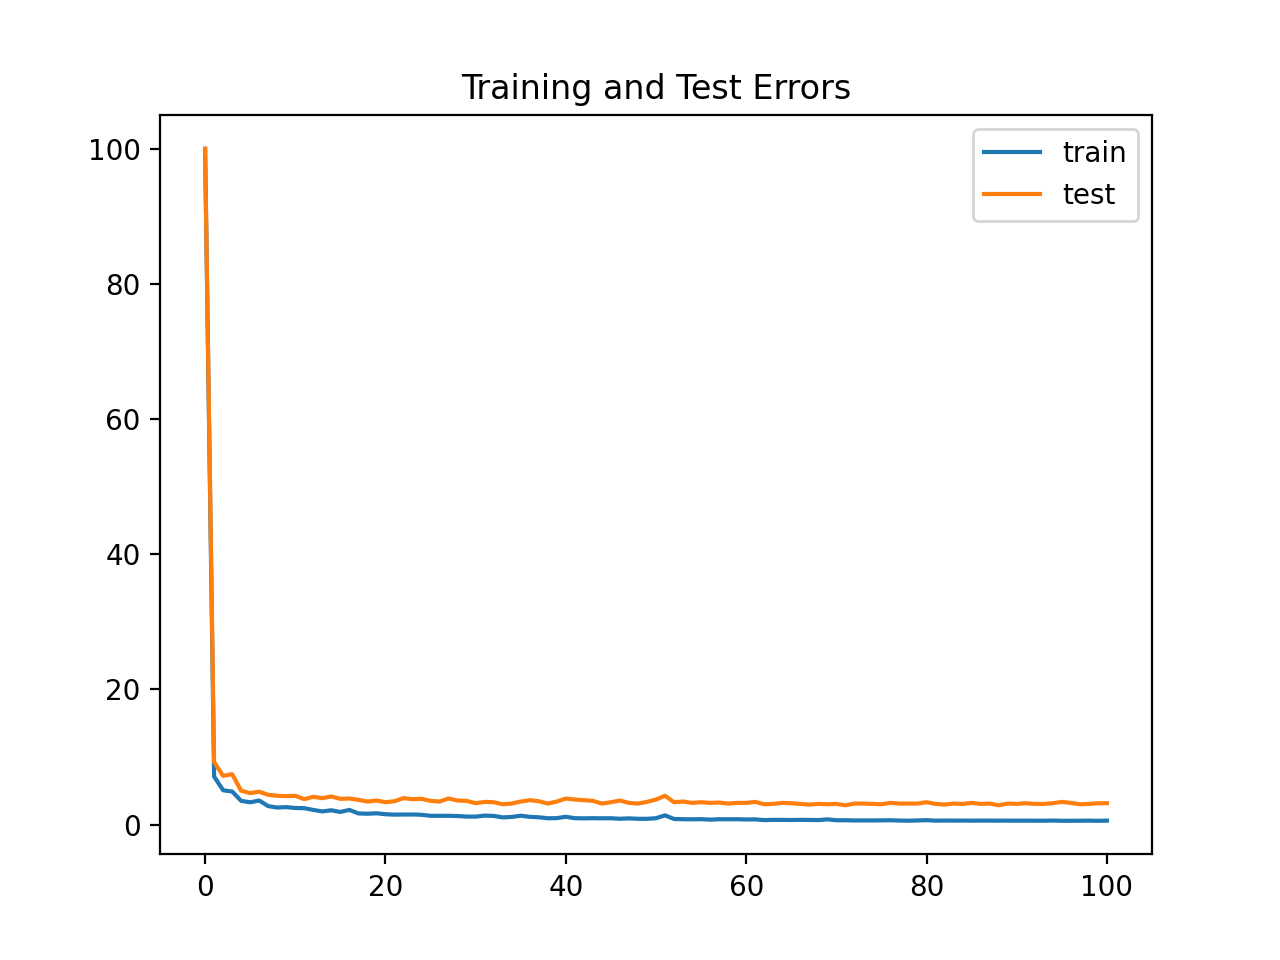

In [96]:
from IPython.display import Image
Image(filename='TrainingTestingError.png') 

The error went down signifcantly by epoch 10 and we saw marginal improvements thereafter.

#### 5.3

Confusion Matrix

[[173   0   0   0   0   0   0   1   0   1]
 [  0 231   0   2   0   0   0   0   1   0]
 [  1   0 212   0   0   0   2   3   1   0]
 [  0   0   0 204   0   0   0   2   0   1]
 [  1   0   2   0 211   0   1   0   0   2]
 [  0   0   0   4   1 167   4   1   1   1]
 [  2   0   0   0   0   2 172   0   2   0]
 [  0   3   2   1   0   1   0 194   2   2]
 [  1   0   1   1   0   0   0   1 187   1]
 [  0   0   0   3   2   0   0   2   1 186]]

In [ ]:
[[173   0   0   0   0   0   0   1   0   1]
 [  0 231   0   2   0   0   0   0   1   0]
 [  1   0 212   0   0   0   2   3   1   0]
 [  0   0   0 204   0   0   0   2   0   1]
 [  1   0   2   0 211   0   1   0   0   2]
 [  0   0   0   4   1 167   4   1   1   1]
 [  2   0   0   0   0   2 172   0   2   0]
 [  0   3   2   1   0   1   0 194   2   2]
 [  1   0   1   1   0   0   0   1 187   1]
 [  0   0   0   3   2   0   0   2   1 186]]

The confusion matrix is also printed above with the output. It seems that the neural net tends to predict 9 more, so for instance in the last column we can see two instances of 4 and 7 being predicted as 9. Similarly we have 2 and 7, as well as 5 and 6.

#### 5.4

The Neural Net gave a best test accuracy of 96.85%. I used a three layer Network, layer 1 had 75 nodes, layer 2 had 64 nodes, the first and second layer activations were relu while the third layer activation was sigmoid. I did experiment with more layers, different activations and regularization, but rather than overengineering the network, this configuration trained pretty quickly on my machine and gave decent results.